## Building Modules

Lesson Outline
In this lesson, we will:

Learn how to create reusable and maintainable Python modules
Expand our understanding of OOP to include abstraction and inheritance
Practice critical design patterns for larger code bases


### Importing Code
We've previously explored how to import modules from the Python Standard Library. We'll now dig deeper into how Python imports work, and how you can make your codebase more modular and usable by creating modules of your own.

In Python, the hierarchy of a module and it's member objects, methods, and variables is known as it's Fully Qualified Name. This concept allows us to use the "dot" notation to select which submodule we'd like to interact with (e.g. email.mime.text).

Use the following code blocks to answer the question:

Block A
from random import randint
randnum = randint(0, 5)
Block B
import random
randnum = random.randint(0, 5)

### The Basic Import Mechanism
Let's get an overview of the basic import mechanism. (If this doesn't completely make sense right away, hang on—we'll get some hands-on practice with it on the next page.)

When we use the import keyword, we're indicating to the Python interpreter that we'd like to bind a separate module of code to the current file. This is achieved in a few steps:

Resolve the path and find the module. Python takes the given path and searches for a module with a matching name in its known set of locations (normally a directory called sys.path).
Initialize the module via __init.py__. Python modules include a special file named __init__.py which contains some code to initialize the module (i.e. import module dependencies and bundle submodules). When the import keyword is run, the path to the module is resolved and then the corresponding __init__.py file is run. Watch for this in the upcoming exercise, where you'll be creating the __init__.py files yourself!
Bind the module to a variable name. If the as keyword is used (e.g., from os import open as open_), the resolved module is bound to the specified variable name.
After these three steps are complete, the module can then be used within the script.

We will dig deeper into this mechanism as we continue to explore modules—this is just to give you a basic idea to start with.

Multiple Imports
Python allows us to combine multiple import statements into one import statement:

import os, sys, random
However, this is considered bad practice (see PEP-8) and it is preferred to import each module on its own line:

import os
import sys
import random
Furthermore, if we're partially importing from a specific module, it is considered good practice to use a multiple import statement for each submodule:

from os import name, environ
from sys import path
from random import randrange, randint
OK, but why should we follow these practices? The main underlying idea is to group together imports of a similar concept so that it is easy to glance at imports and find a particular relevant module or class. By following these simple rules, we have a consistent mental model if we want to add or change an import statment.

For more information, check out the PEP-8 page on imports.

Additional Resources:
Python Import Documentation https://docs.python.org/3/reference/import.html
Stack Overflow Discussion on Import https://stackoverflow.com/questions/9439480/from-import-vs-import




### Understanding Code Imports
In this exercise, Gabe will walk through the basics of creating and using modules in Python. You can follow along with him either here in this workspace or on your own computer.

Note: You'll need to create some files and directories in this exercise. You can find (and open) any files you create by using the file browser in the upper left:
 
screenshot showing the folder icon for the file browser

When you create a new file (like when you run touch somefile.py), it may not show up right away in the file browser. If that's the case, just click the Refresh File List button:

Screenshot showing the Refresh File List button

### Try it!
Be sure to try these things for yourself:

Create a second file called aloha.py and move the say_hi function into it.
Add the __init__.py file in the same directory as aloha.py.
Import the say_hi method from aloha.py in your main.py file.
Follow these same principles to create a second file adios.py containing a method, say_goodbye, that will print a goodbye message.

#Directory contents
__init__.py
main.py
aloha.py
adios.py

In [ ]:
#aloha.py
def say_hi():
    print('hello')

#adios.py    
def say_goodbye():
    print('byebye')
    
from aloha import say_hi
from adios import say_goodbye

say_hi()
say_goodbye()

### Creating Your First Module


Try it!
Create a new directory called greetings.
Move your aloha.py and adios.py files into the greetings directory.
Create a new __init__.py file in the greetings directory.
Use releative imports to add your say_hi and say_goodbye methods to greetings/__init__.py.

Refactor main.py to use partial imports for say_hi and say_goodbye from the new greetings module.

#Directory contents
__init__.py
main.py
greetings/
    __init__.py
    aloha.py
    adios.py

In [ ]:
#greetings/__init__.py:
from .aloha import say_hi
from .adios import say_goodbye

#main.py:
from greetings import say_hi, say_goodbye

say_hi()
say_goodbye()

### System Thinking in Python: Building a System of Code

In Python, we can organize our code into discrete—but related—units. And as our codebase grows, we'll begin thinking about our code more and more as a system of such interconnected components.

Classes are one of these fundamental units. As we've discussed previously, a class can have data (in the form of instance variables) and behaviors or actions (in the form of instance methods).

As we build more functionality, we may find that many of our classes are related—and that they share some of the same data and behaviors. For example, Cats and Dogs are both Animals, so they may have some of the same variables and methods. In these cases, it would be ideal if we were able to share code between these related types of objects. This would ensure our code follows the Don't Repeat Yourself (DRY) principle. It would also give us a simple shared interface so we can work with similar types of objects in a more organized way. For example, we would be able to specify (in one place) that all animals have a speak method, and avoid having to write this method in multiple classes.

Let's see how we can use inheritance to accomplish these goals.

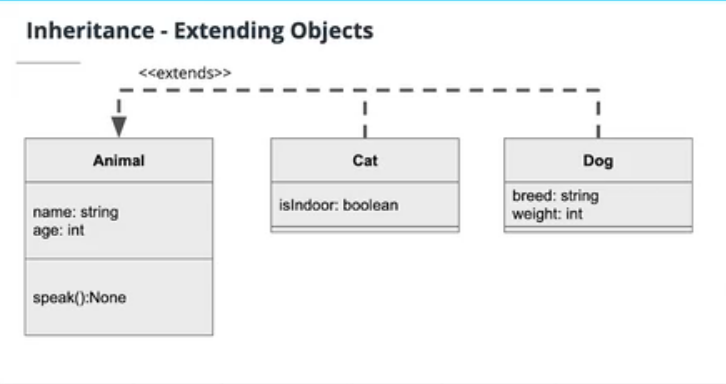



Inheritance can be useful when we have multiple classes that share the same properties. For example, we can create an Animal class with the properties that we want to have in both our Cat and Dog children classes.

Children classes will inherit all of the properties of the parent class, but can also be extended to have their own unique properties.

Pythonic Class Inheritance

Basic Inheritance
Let's review the example from the video. First, we create a parent class called FoodInterface:

class FoodInterface():
    def __init__(self, mustCook):
        self.mustCook = mustCook
Then we can create children classes, such as IceCream and HotDog:

class IceCream(FoodInterface):
   def __init__(self, flavor):
       self.flavor = flavor
       super().__init__(False)


class HotDog(FoodInterface):
   def __init__(self, meat):
       self.meat = meat
       super().__init__(True)
Notice how we indicate that these inherit from FoodInterface by placing the name inside parentheses. For example, HotDog(FoodInterface) indicates that HotDog inherits from FoodInterface.

We can also extend our children classes to have their own properties—for example, we can give our IceCream class a flavor variable.

Using super
The super function allows us to access any parameters or methods on a parent class.

Consider the above example where we define the IceCream class. The line super().__init__(False) calls the __init__ method on FoodInterface and passes in the value False for the mustCook parameter. In other words, this means any IceCream objects we instantiate will have a mustCook property that is set to False.

Use the following graphic to answer the questions below:

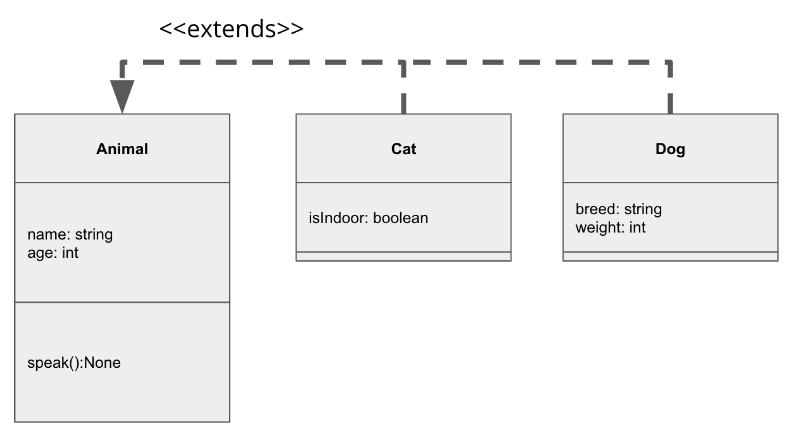

## Try it!
We've provided the basic code for a Cat and Dog class in the pets.py file (top right).

Here are your key tasks:

Examine these two classes and create a new Animal class that defines any shared instance variables.
Refactor the Cat and Dog classes to inherit theAnimal class.
Try to create a new Frog class that also has a color instance variable. For now, do not define a speak method. Test your Frog class by instantiating a Frog object and checking that you can access its name, age, and color.

In [ ]:
class Animal():
    def __init__(self, name:str, age:int):
        """Create a new cat"""
        self.name = name
        self.age = age


class Cat(Animal):
    isIndoor = True

    def __init__(self, name: str, age:int, isIndoor=True):
        """Create a new cat"""
        self.isIndoor = isIndoor
        super().__init__(name, age)

    def speak(self):
        """Make the cat pur"""
        print(f'{self.name} says, "purrrrrr"')


class Frog(Animal):

    def __init__(self, name: str, age:int, color='Green'):
        self.color = color
        super().__init__(name, age)


class Dog(Animal):

    def __init__(self, name:str, age:int, breed:str, weight:int):
        """Create a new dog"""
        self.breed = breed
        self.weight = weight
        super().__init__(name, age)

    def speak(self) -> None:
        """Make the dog bark"""
        print(f'{self.name} says, "woof"')


if __name__ == "__main__":
    wiskers = Cat('Wiskers', 3)
    wiskers.speak()

    paws = Dog('Mr. Paws', 4, 'dachshund', 18)
    paws.speak()

    hops = Frog('Hops', 1, 'Blue')
    print(f'The frog is named {hops.name}, is {hops.age} years old, and is the color {hops.color}.')

### Abstract Classes
What is an abstract class?
When defining objects, we often need a way to only partially define those objects. For example, we may know that objects made from a particular class should all include a particular method, but it is not clear what the body of that method should be. With our example of an Animal class, we may know that we want it to have an eat method (since all Animal objects need to eat), but not know the specifics of what that method should do (since each Animal can have different eating behavior).

In these cases, we may wish to have multiple classes with the same type of interface. We can define a rough or abstract form of the class that provides a skeleton of the class structure and allows us to further define the object through inheritance.

Note that when we are defining an abstract class, we don't want to instantiate objects directly from that class. If we define an Animal class with an abstract eat method, it does not make sense to instantiate an Animal object directly from this class. Instead, we want other classes (Cat, Dog, etc.) to inherit from this base class—and we want all of the methods to be defined in those children classes.

In Python we can define an abstract class by inheriting the [Python Standard Library's Abstract Base Class](https://docs.python.org/3/library/abc.html) (ABC). This helps us out in two ways:

It prevents an abstract class from being instantiated.
It indicates that any abstract methods should be defined in the children classes.
To do this, we would first import ABC, and then we can have our Animal class inherit from it:

from abc import ABC

class Animal(ABC):
    pass


## Abstract Class

Try it!¶
You've previously refactored the Cat and Dog classes in the pets.py file (top right) to inherit from an Animal class that defined some shared attributes. Let's further refactor these classes to make the Animal class an abstract class.

Here are your key tasks:

Import the ABC class and abstractmethod decorator from the abc module.
Refactor theAnimal class to include the speak method signature.
Try to run the code and observe any errors.
Refactor the Frog class to implement a speak method.

In [ ]:
from abc import ABC, abstractmethod

class Animal(ABC):

    def __init__(self, name:str, age:int):
        """Create a new cat"""
        self.name = name
        self.age = age

    @abstractmethod
    def speak(self):
        pass

class Cat(Animal):
    isIndoor = True

    def __init__(self, name: str, age:int, isIndoor=True):
        """Create a new cat"""
        self.isIndoor = isIndoor
        super().__init__(name, age)

    def speak(self) -> None:
        """Make the cat pur"""
        print(f'{self.name} says, "purrrrrr"')


class Frog(Animal):

    def __init__(self, name: str, age:int, color='Green'):
        self.color = color
        super().__init__(name, age)

    def speak(self) -> None:
        """Make the frog croak"""
        print(f'{self.name} says, "ribbit"')


class Dog(Animal):

    def __init__(self, name:str, age:int, breed:str, weight:int):
        """Create a new dog"""
        self.breed = breed
        self.weight = weight
        super().__init__(name, age)

    def speak(self) -> None:
        """Make the dog bark"""
        print(f'{self.name} says, "woof"')


if __name__ == "__main__":
    wiskers = Cat('Wiskers', 3)
    wiskers.speak()

    paws = Dog('Mr. Paws', 4, 'dachshund', 18)
    paws.speak()

    hops = Frog('Hops', 1, 'Blue')
    hops.speak()

### Module


Try it!
Our pets.py file is getting quite long since it contains code for the Animal, Cat, Dog, and Frog classes. Let's further refactor this codebase into a module!

Here are your key tasks:

Create a directory for your module.
Create an __init__.py file in your new module directory and in the project root.
Create separate files for the Animal, Cat, Dog, and Frog classes.
Refactor each file to import the appropriate classes.

The final directory tree should appear as the following:


.
|____ __init__.py
|____ pets.py
|____ animals/
| |____ __init__.py
| |____ cat.py
| |____ animal.py
| |____ frog.py
| |____ dog.py



In [ ]:
#__init__.py
from abc import ABC, abstractmethod

class Animal(ABC):

    def __init__(self, name:str, age:int):
        """Create a new cat"""
        self.name = name
        self.age = age

    @abstractmethod
    def speak(self):
        pass

In [ ]:
#cat.py
from .animal import Animal

class Cat(Animal):
    isIndoor = True

    def __init__(self, name: str, age:int, isIndoor=True):
        """Create a new cat"""
        self.isIndoor = isIndoor
        super().__init__(name, age)

    def speak(self):
        """Make the cat pur"""
        print(f'{self.name} says, "purrrrrr"')

In [ ]:
#dog.py
from .animal import Animal

class Dog(Animal):

    def __init__(self, name:str, age:int, breed:str, weight:int):
        """Create a new dog"""
        self.breed = breed
        self.weight = weight
        super().__init__(name, age)

    def speak(self) -> None:
        """Make the dog bark"""
        print(f'{self.name} says, "woof"')
        
        

In [ ]:
#frog.py
from .animal import Animal

class Frog(Animal):

    def __init__(self, name: str, age:int, color='Green'):
        self.color = color
        super().__init__(name, age)

    def speak(self):
        """Make the cat pur"""
        print(f'{self.name} says, "ribbit"')

In [ ]:
#pets.py
from animals import Dog, Cat, Frog

if __name__ == "__main__":
    wiskers = Cat('Wiskers', 3)
    wiskers.speak()

    paws = Dog('Mr. Paws', 4, 'dachshund', 18)
    paws.speak()

    hops = Frog('Hops', 1, 'Blue')
    hops.speak()

## Advanced Object-Oriented Programing
The object-oriented design pattern simplifies how we can organize and manage our code. Let's now dig into some more advanced features to maximize the benefits of OOP.

Method Overrides

When to Override
As you practice inheritance and build more complex systems of classes, you'll find the need to redefine methods and functionality. This redefinition is known as overriding methods. Ultimately, it is as simple as re-writing a method body. You may need to override a method when:

You are realizing an abstract class
You are extending a class and the method definition is now dependent on new information in the child class
You want to ensure an object fully realizes the base object's interface (i.e. init, repr, str)
Keep in mind, you can always access the parent method's implementation of a specific method using the super() method. This will allow you to extend a method without repeating code. For example:

class BaseClass():
    def simple_method():
        return 'hello'

class SimpleClass(BaseClass):
    def simple_method():
        return super().simple_method() + ' world'
Class Methods
Play Video
Use the following code to answer the questions below:

...

class FoodInterface(ABC):
    ...
    cooking_temp = 200
    def __init__(self, isVegan):
        self.isVegan = isVegan

    @abstractmethod
    def eat(self):
        pass

    @classmethod
    def cook(cls, isVegan):
        if temp > cls.cooking_temp:
            return cls(isVegan)

class HotDog(FoodInterface):
    ....
    def eat(self):
        print('bite')

    def applyCondiments(self, type):
        self.condiments.append(type)


### Overrides
Suppose that we want to be able to compare two of our Dog objects to see whether one is older than the other:


sally = Dog('Sally', 6, 'chihuahua', 7)
henry = Dog('Henry', 7, 'terrier', 15)
if sally > henry:
    print(f'{sally} is older than {henry}')
else:
    print(f'{henry} is older than {sally}')
As it currently stands, this code won't work. Go ahead and try running the dog.py script shown on the right. You should get a TypeError:

TypeError: '>' not supported between instances of 'Dog' and 'Dog'
Of course, the trouble is that we are comparing the two Dog objects themselves, rather than comparing the values of their age variables. What does it mean for sally to be greater than henry? This is undefined behavior for the > operator, so Python gives us the TypeError. But what if that is the behavior we want? What if we want to be able to compare two Dog objects and have Python assume that we want to compare the ages of the dogs? In that case, we would need to override the default behavior.

So how do we override the behavior of a comparison operator like the > operator? As it turns out, Python has a number of dunder (double underscore) methods that correspond to the standard comparison operators. Here's a table that shows each operator and the corresponding method:

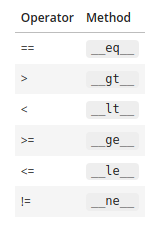

In this exercise, we'll explore how we can override these methods in order to change how comparisons are perfomed between our Dog objects.

Try it!
We've provided the basic Dog class in the file dog.py (top right).

Your tasks:

If you haven't already, try running the original code in order to see the TypeError for yourself.
Override the __str__ method to print the Dog's name instance variable.
Override the __gt__ method to compare using the greater than operator.
Try overriding other comparison methods (e.g., you can override __eq__ to check if the dogs are the same age).

In [ ]:
class Dog():

    def __init__(self, name:str, age:int,
                 breed:str, weight:int):
        """Create a new dog"""
        self.breed = breed
        self.weight = weight
        self.name = name
        self.age = age

    def speak(self) -> None:
        """Make the dog bark"""
        print(f'{self.name} says, "woof"')

    def __str__(self):
        return self.name        

    def __eq__(self, other):
        return self.age == other.age

    def __gt__(self, other):
        return self.age > other.age


if __name__ == "__main__":
    sally = Dog('Sally', 6, 'chihuahua', 7)
    henry = Dog('Henry', 7, 'terrier', 15)
    if sally == henry:
        print(f'{sally} and {henry} are the same age.')
    elif sally > henry:
        print(f'{sally} is older than {henry}.')
    else:
        print(f'{henry} is older than {sally}.')

### Class Methods

Try it!
Continue extending the provided Dog class in the file dog.py (top right) to include a classmethod. The spawn method should take a new name for the puppy along with two other Dog arguments for a mother and a father. The method should dynamically set the breed (either as a mixed breed if the parents are not the same or as the parent breed). The weight should be 10x smaller than the average weight of the parents. The method will create a new Dog object with these properties.

Your tasks: Add the following code to the bottom of the script to test your methods:

Create a new spawn classmethod using the @classmethod decorator.
Implement the method body as specified.
Use cls to create a new Dog with these properties.

if __name__ == "__main__":
    sally = Dog('Sally', 6, 'chihuahua', 7)
    henry = Dog('Henry', 7, 'terrier', 15)
    trixy = Dog.spawn('Trixy', sally, henry)
    print(trixy.breed)

In [ ]:
class Dog():

    def __init__(self, name:str, age:int,
                 breed:str, weight:int):
        """Create a new dog"""
        self.breed = breed
        self.weight = weight
        self.name = name
        self.age = age

    def speak(self) -> None:
        """Make the dog bark"""
        print(f'{self.name} says, "woof"')

    def __str__(self):
        return self.name        

    def __eq__(self, other):
        return self.age == other.age

    def __gt__(self, other):
        return self.age > other.age

    @classmethod
    def spawn(cls, name, mother, father):
        breed = mother.breed
        if mother.breed != father.breed:
            breed = f'{mother.breed}-{father.breed} Mix.'
        weight = (mother.weight + father.weight)/(2*10)
        return cls(name, 0, breed, weight)


if __name__ == "__main__":
    sally = Dog('Sally', 6, 'chihuahua', 7)
    henry = Dog('Henry', 7, 'terrier', 15)
    trixy = Dog.spawn('Trixy', sally, henry)
    print(trixy.breed)